<a href="https://colab.research.google.com/github/MariamAbdi22/AI-Assignments/blob/main/AIPracticalExercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('Mall_Customers.csv')


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df.duplicated()  #there are no duplicate values.
df.isnull()     #there are no missing values


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


<Axes: ylabel='Annual Income (k$)'>

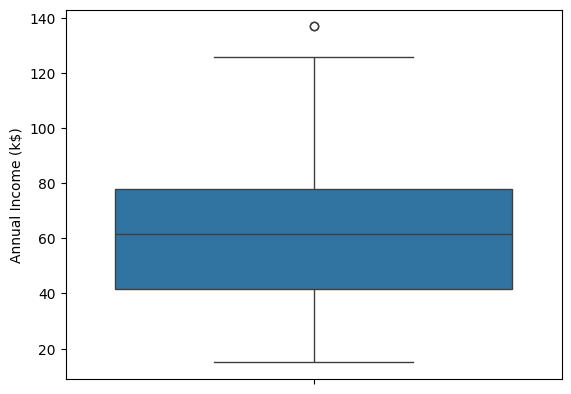

In [ ]:
      #there are no outliers
data=df['Annual Income (k$)']
sns.boxplot(y=data, data=df)





In [ ]:
df.describe() #dataset is not normalized

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#Normalizing the dataset using MinMaxScaler


features=['Age','Annual Income (k$)','Spending Score (1-100)']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

df_scaled.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [ ]:
#carrying out exploratory data analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


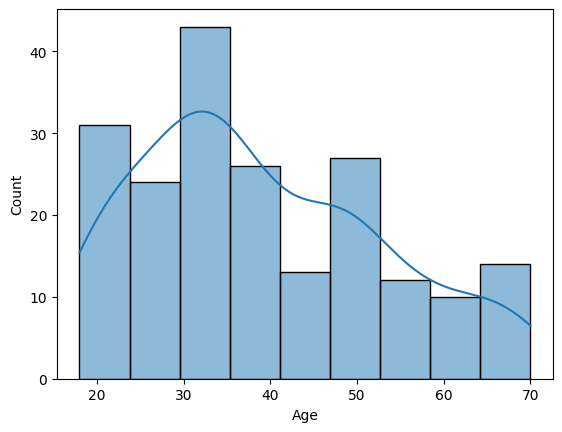

In [ ]:
#visualize distributions
sns.histplot(df['Age'], kde=True)
plt.show()


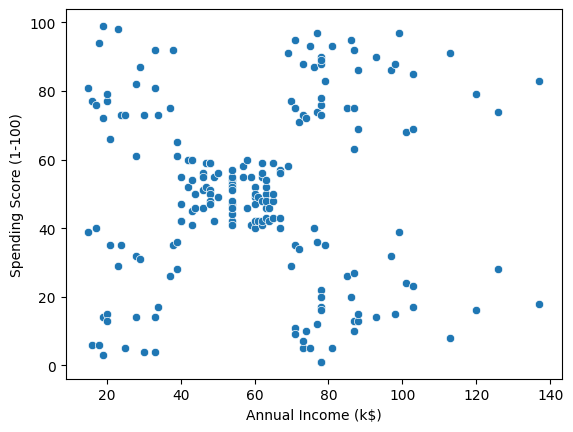

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

In [ ]:
#verify the optimal number of clusters using both the elbow and silhouette scores for verification.


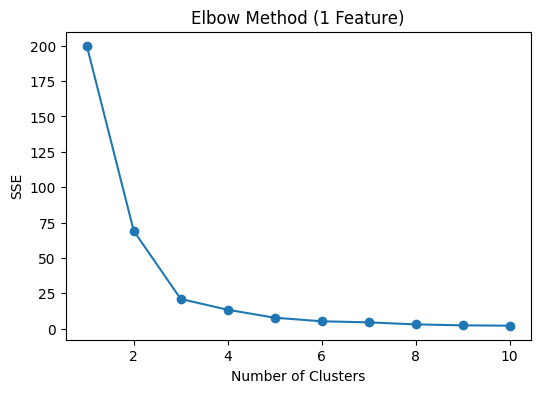

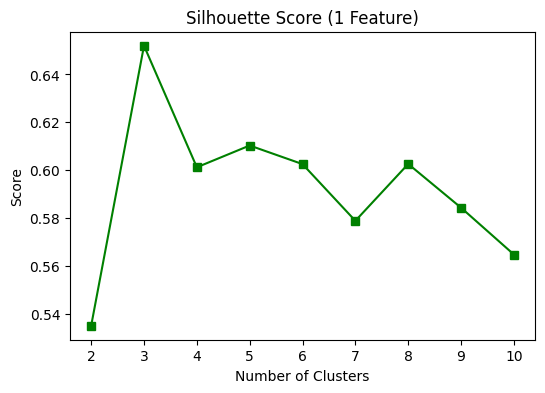

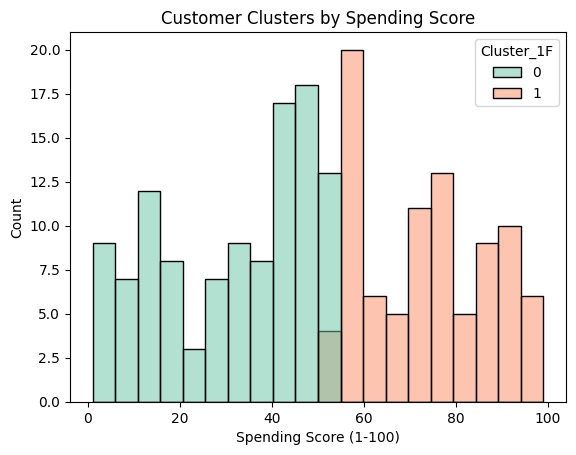

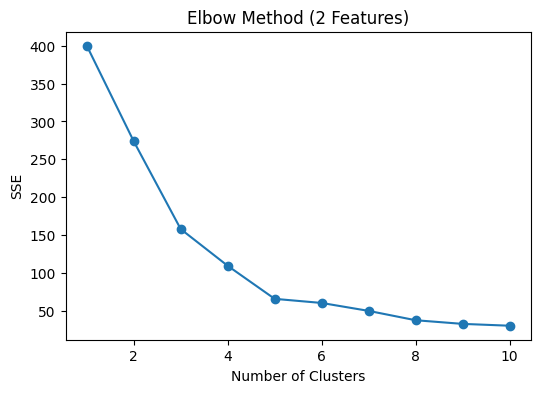

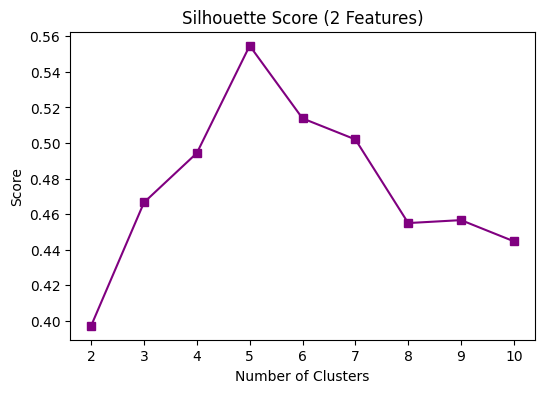

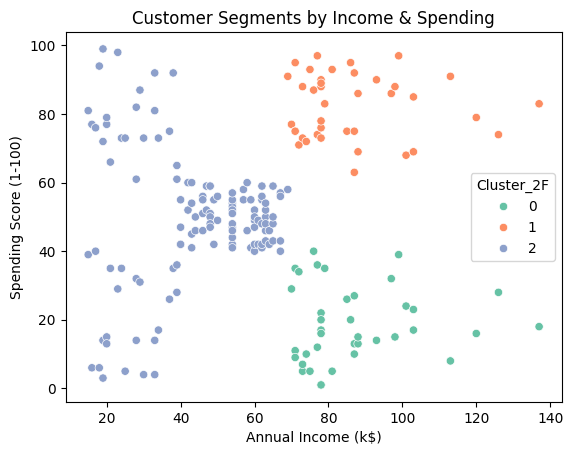

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv("Mall_Customers.csv")


df.drop("CustomerID", axis=1, inplace=True)
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

#Elbow Method (1 Feature: Spending Score)
X1 = df[["Spending Score (1-100)"]]
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method (1 Feature)")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Silhouette Score (1 Feature)
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X1_scaled)
    sil_scores.append(silhouette_score(X1_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sil_scores, marker='s', color='green')
plt.title("Silhouette Score (1 Feature)")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

#Cluster Plot (1 Feature)
kmeans_1f = KMeans(n_clusters=2, random_state=42)
df["Cluster_1F"] = kmeans_1f.fit_predict(X1_scaled)

sns.histplot(data=df, x="Spending Score (1-100)", hue="Cluster_1F", palette="Set2", bins=20)
plt.title("Customer Clusters by Spending Score")
plt.show()

#Elbow Method (2 Features)
X2 = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X2_scaled = scaler.fit_transform(X2)

sse2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    sse2.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), sse2, marker='o')
plt.title("Elbow Method (2 Features)")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#Silhouette Score (2 Features)
sil_scores2 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X2_scaled)
    sil_scores2.append(silhouette_score(X2_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sil_scores2, marker='s', color='purple')
plt.title("Silhouette Score (2 Features)")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

#Cluster Plot (2 Features)
kmeans_2f = KMeans(n_clusters=3, random_state=42)
df["Cluster_2F"] = kmeans_2f.fit_predict(X2_scaled)

sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster_2F", palette="Set2")
plt.title("Customer Segments by Income & Spending")
plt.show()